In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [13]:
#1. 데이터
datasets = load_boston()
x = datasets.data
y = datasets.target

print(x.shape, y.shape)  # (506, 13) (506,)
print(datasets.feature_names)
print(datasets.DESCR)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibil

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size = 0.8, shuffle=True, random_state=72
)
print(x_train.shape, y_train.shape) # (404, 13) (404,)
print(x_test.shape, y_test.shape)   # (102, 13) (102,)

(404, 13) (404,)
(102, 13) (102,)


In [15]:
#2. 모델구성
model = Sequential()
model.add(Dense(7, input_dim=13))
model.add(Dense(10))
model.add(Dense(30))
model.add(Dense(50))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(1))

In [18]:
#3. 컴파일, 훈련 (validation data 및 verbose)
model.compile(loss='mse', optimizer='adam')
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10,
         verbose=0) # verbose= 1 훈련과정 확인 / verbose = 0 훈련과정 생략

In [22]:
# history 확인
print(hist)
print(hist.history)
print('==================================')
print(hist.history['loss'])
print(hist.history['val_loss'])

{'loss': [31.01436424255371, 36.62596893310547, 33.288719177246094, 31.052419662475586, 35.61513900756836, 45.18387985229492, 36.08268737792969, 34.479087829589844, 30.86412239074707, 34.189300537109375], 'val_loss': [28.3371639251709, 31.374401092529297, 30.828020095825195, 34.876731872558594, 42.64329528808594, 39.308128356933594, 26.228355407714844, 27.593509674072266, 28.814926147460938, 28.683719635009766]}
[31.01436424255371, 36.62596893310547, 33.288719177246094, 31.052419662475586, 35.61513900756836, 45.18387985229492, 36.08268737792969, 34.479087829589844, 30.86412239074707, 34.189300537109375]
[28.3371639251709, 31.374401092529297, 30.828020095825195, 34.876731872558594, 42.64329528808594, 39.308128356933594, 26.228355407714844, 27.593509674072266, 28.814926147460938, 28.683719635009766]


In [8]:
#4. 평가, 예측
loss = model.evaluate(x_test, y_test)
y_predict = model.predict(x_test)
r2 = r2_score(y_test, y_predict)


print('loss : ' , loss)
print('r2 : ', r2)

4/4 [==============================] - 0s 7ms/step - loss: 37.6224
loss :  37.6224365234375
r2 :  0.5394765077148487


Duplicate key in file PosixPath('/opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 758 ('font.family : NanumGothicCoding')


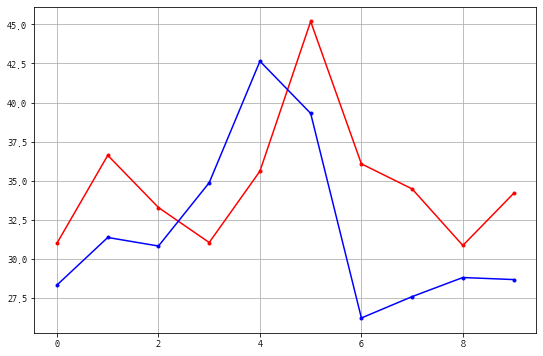

In [ ]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(hist.history['loss'], marker='.', c='red', label='loss')
plt.plot(hist.history['val_loss'], marker='.', c='blue', label='val_loss')
plt.grid()
plt.show()